In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
import plotly.express as xp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## normalizing the data

In [20]:
#normalizing the data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [21]:
data_norm=norm_func(data.iloc[:,1:])
data_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


## applying hierarchial clustering

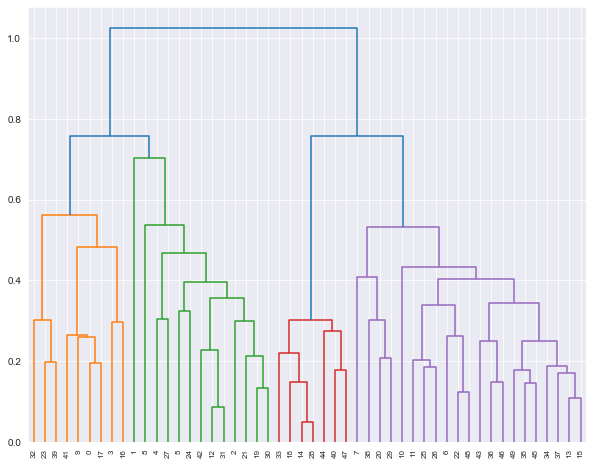

In [73]:
plt.figure(figsize=(10,8))
dendrogram= sch.dendrogram(sch.linkage(data_norm, method='weighted'))

In [74]:
agg_clus=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')

In [75]:
y_agg_clus=agg_clus.fit_predict(data_norm)
y_agg_clus

array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [83]:
data['y_agg_clus']=y_agg_clus
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_agg_clus
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [84]:
data.groupby(["y_agg_clus"])["Unnamed: 0"].apply(lambda x:tuple(x))

y_agg_clus
0    (Alabama, Alaska, Georgia, Louisiana, Mississi...
1    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Arizona, California, Colorado, Florida, Illin...
Name: Unnamed: 0, dtype: object

In [85]:
data['y_agg_clus'].value_counts()

1    20
3    12
2    10
0     8
Name: y_agg_clus, dtype: int64

- heirarchial method has determined 4 clusters with above mentioned data in each

## applying the Kmean method for clustering
- before that we will have to check the optimal number of clsuter numbers

- applying elbow method to get the optimal number of cluster number.

In [45]:
nc=[2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(data_norm)
    iner.append(km.inertia_)


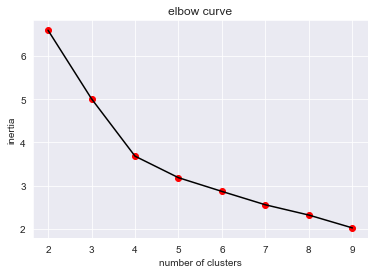

In [89]:
sns.set_style('darkgrid')
plt.scatter(nc, iner, color= 'red')
plt.plot(nc, iner, color= 'black')
plt.title('elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

### The elbow method is showing 4 is the optimal value of the clusters

In [101]:
km_clus=KMeans(n_clusters=4)
km_clus.fit(data_sc)

KMeans(n_clusters=4)

In [102]:
y_km_clus=km_clus.predict(data_sc)

In [104]:
km_clus.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       3, 0, 2, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 2, 1,
       3, 1, 1, 3, 3, 1])

In [95]:
data_km=data.copy()

In [108]:
data_km['y_km_clus']=km_clus.labels_
data_km

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,y_km_clus
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [110]:
data_km['y_km_clus'].value_counts()


1    16
2    13
3    13
0     8
Name: y_km_clus, dtype: int64

In [109]:
data_km.iloc[:,1:5].groupby(data_km['y_km_clus']).mean()

,Murder,Assault,UrbanPop,Rape
y_km_clus,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,10.815385,257.384615,76.000000,33.192308
3,3.600000,78.538462,52.076923,12.176923


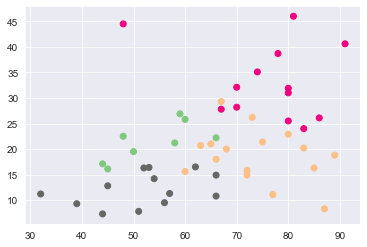

In [111]:
plt.scatter(data_km.iloc[:,3],data_km.iloc[:,4],c=y_km_clus,cmap=plt.cm.Accent)

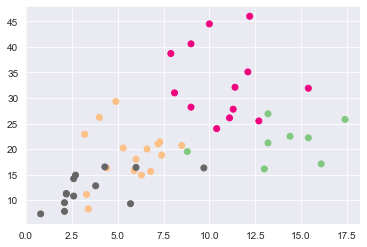

In [126]:
plt.scatter(data_km.iloc[:,1],data_km.iloc[:,4],c=y_km_clus,cmap=plt.cm.Accent)

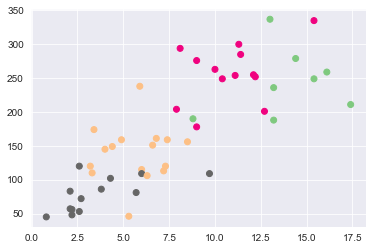

In [127]:
plt.scatter(data_km.iloc[:,1],data_km.iloc[:,2],c=y_km_clus,cmap=plt.cm.Accent)

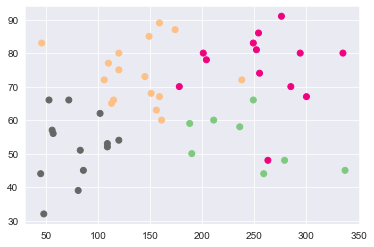

In [131]:
plt.scatter(data_km.iloc[:,2],data_km.iloc[:,3],c=y_km_clus,cmap=plt.cm.Accent)

## applying DBSCAN

In [113]:
data_db=data_km.copy()
data_db.drop(labels='y_km_clus', axis=1, inplace=True)

In [114]:
data_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [124]:
db_clus=DBSCAN(min_samples=4, eps=2)
y_db_clus=db_clus.fit_predict(data_sc)

In [125]:
data_db['db_clus']=y_db_clus
data_db

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,db_clus
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


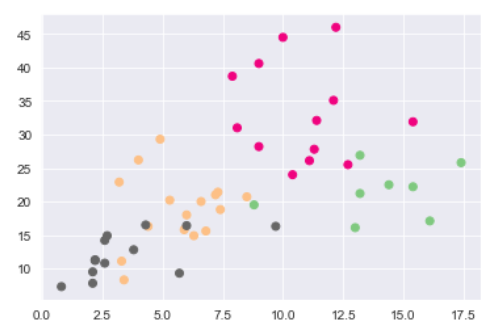
- here we an see that DBScan is not working well inthis data set as the data are very close to each other if we see in the visualization done at the kmeans stage

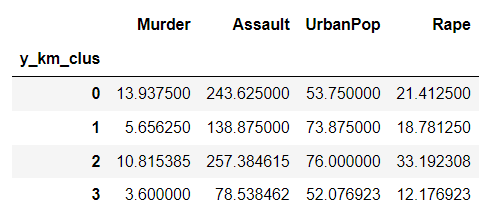
- as in the kmean clustering we can see the results clearly.